In [7]:
# Importar bibliotecas para análise de agrupamento de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
plt.rcParams["figure.figsize"] = (15,10)
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [2]:
# Importar CSV para dataframe
df_country = pd.read_csv('country-data.csv')
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


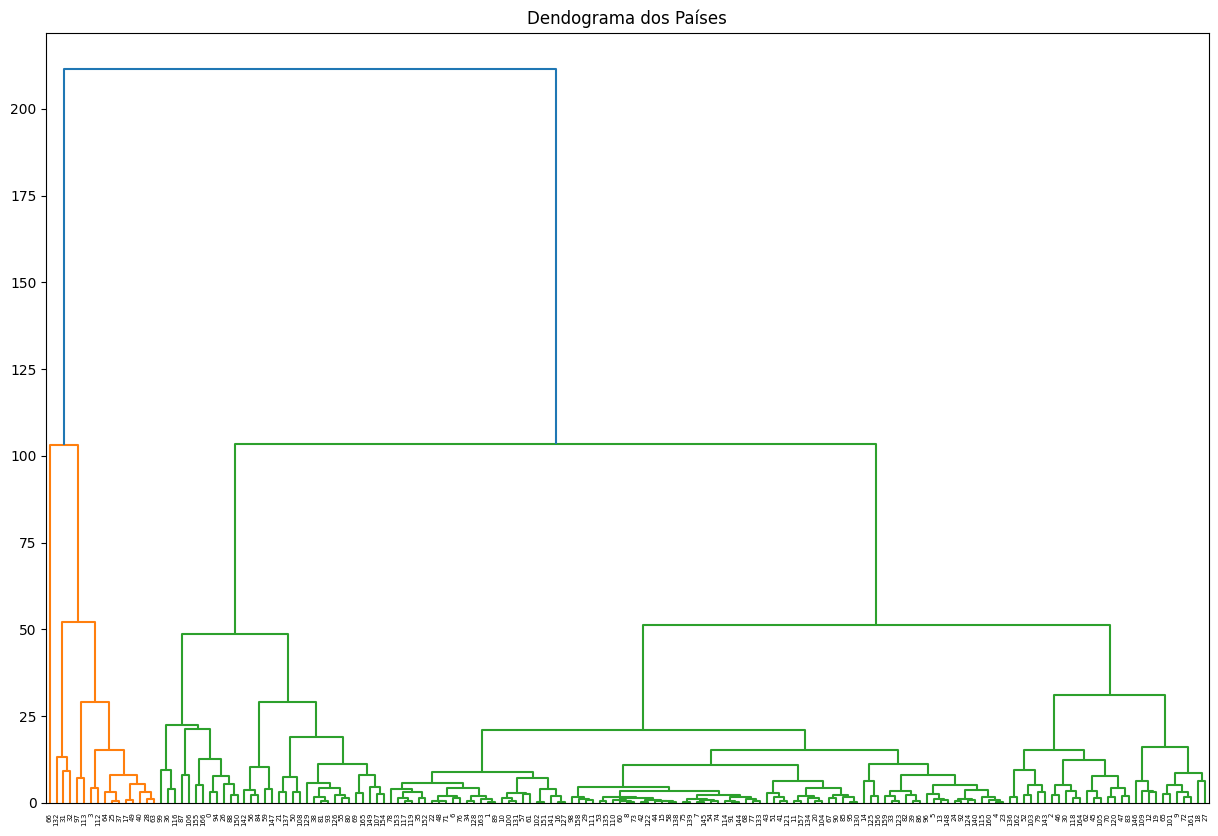

In [8]:
# Para o agrupamento de dados vamos utilizar os atributos 'child_mort' e 'life_expec'
df_country_cluster = df_country[['child_mort', 'life_expec']]
plt.figure(figsize=(15, 10))
plt.title("Dendograma dos Países")
dendograma = shc.dendrogram(shc.linkage(df_country_cluster, method='complete'))

In [9]:
# Vamos usar 4 grupos, o complete linkage e a distância euclidiana.
grupos = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
grupos.fit_predict(df_country_cluster)

C:\Users\gusta\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1,
       3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2], dtype=int64)

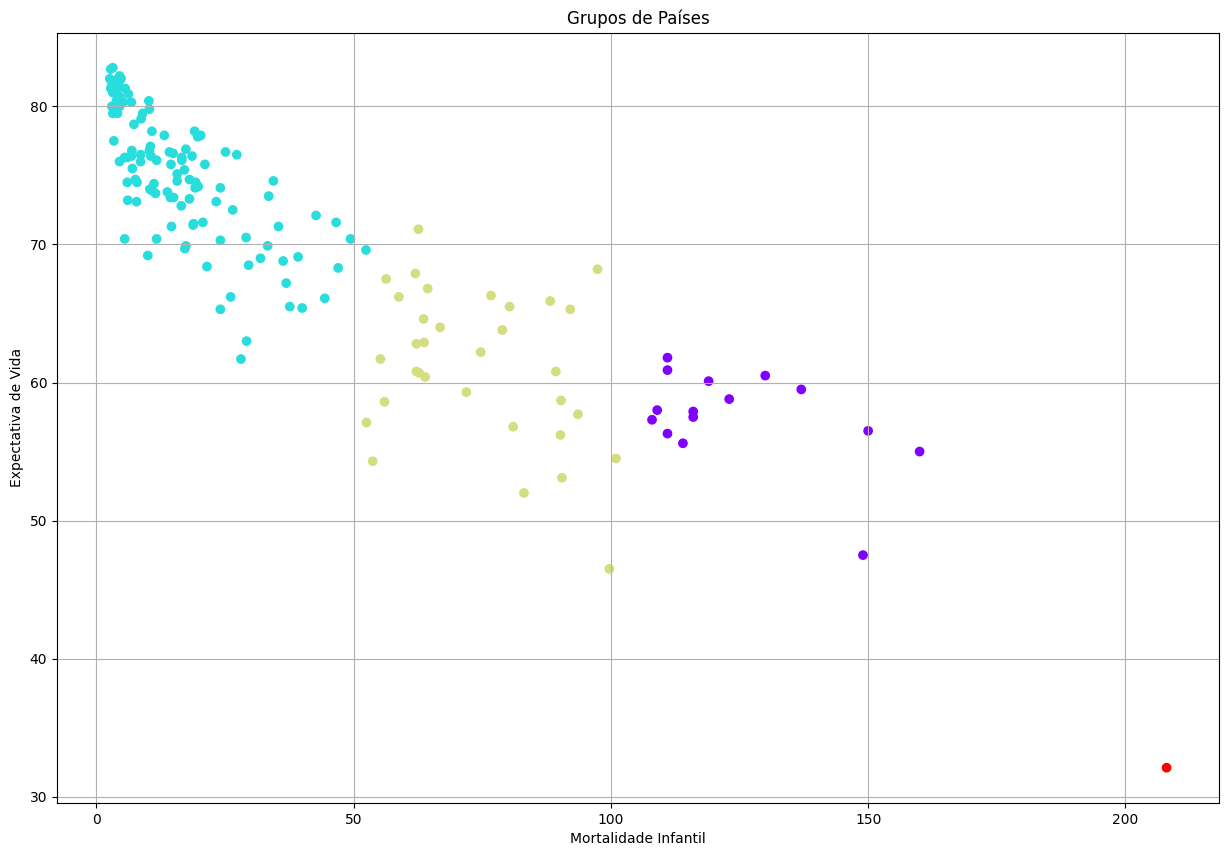

In [11]:
# Construir gráfico de dispersão dos grupos
plt.scatter(df_country_cluster['child_mort'], df_country_cluster['life_expec'], c=grupos.labels_, cmap='rainbow')
plt.xlabel('Mortalidade Infantil')
plt.ylabel('Expectativa de Vida')
plt.title('Grupos de Países')
plt.grid()
plt.show()

In [12]:
# Qual é o país com maior mortalidade infantil?
df_country[df_country['child_mort'] == df_country['child_mort'].max()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662


In [13]:
# Qual é o país com menor expectativa de vida?
df_country[df_country['life_expec'] == df_country['life_expec'].min()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662


In [17]:
# Quais são os 3 países com menor mortalidade infantil?
df_country.sort_values(by='child_mort').head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


In [16]:
# Quais são os 3 países com maior expectativa de vida?
df_country.nlargest(3, 'life_expec')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600


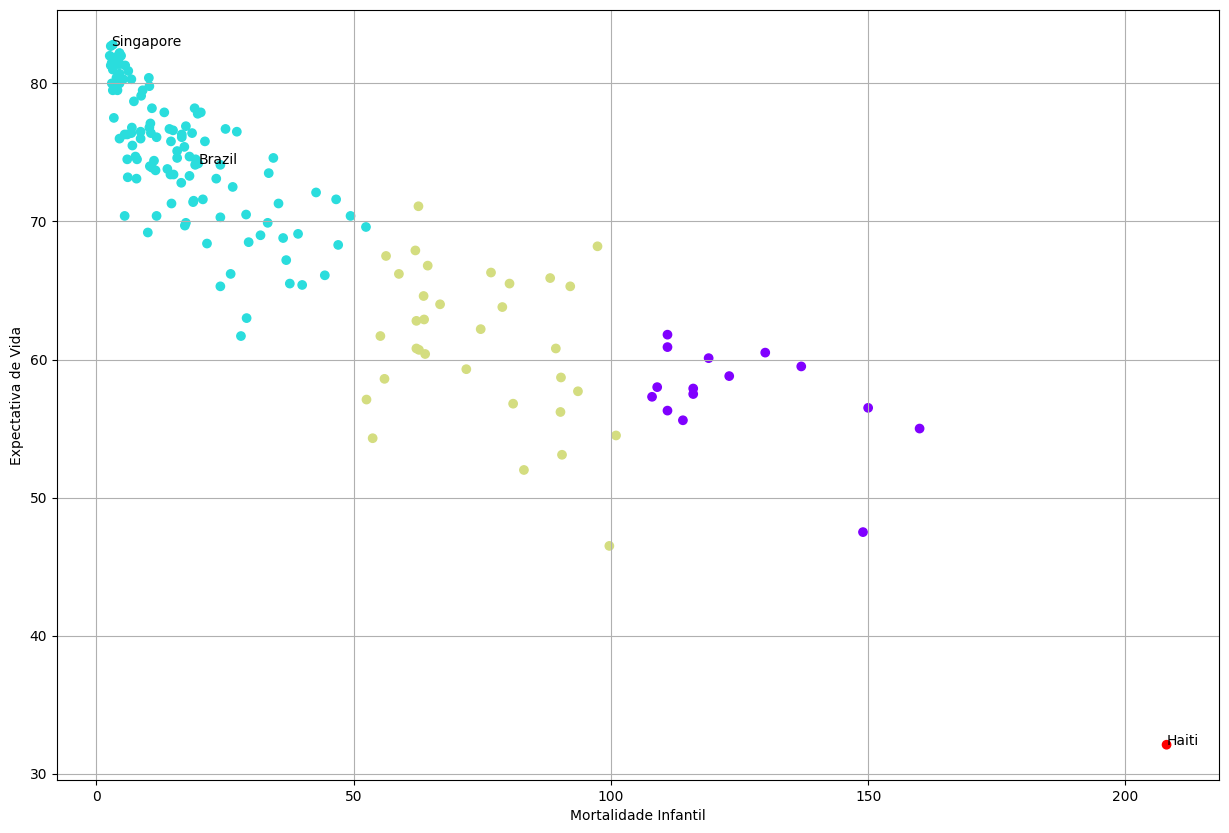

In [18]:
fig, eixo = plt.subplots(figsize=(15, 10))

eixo.scatter(df_country['child_mort'], df_country['life_expec'], c=grupos.labels_, cmap='rainbow')
eixo.set_xlabel('Mortalidade Infantil')
eixo.set_ylabel('Expectativa de Vida')

# iterar sobre os pontos para adicionar os nomes dos países
for i, texto in enumerate(df_country['country']):
    if ((df_country.iloc[i]['life_expec'] < 35) and (df_country.iloc[i]['child_mort'] > 200)
    or (df_country.iloc[i]['life_expec'] > 82) and (df_country.iloc[i]['child_mort'] < 3)
    or (df_country.iloc[i]['country'] == 'Brazil')):
        eixo.annotate(texto, (df_country.iloc[i]['child_mort'], df_country.iloc[i]['life_expec']))

plt.grid()
plt.show()